<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-02-07-Ensemble/Ensemble_December.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# VotingClassifier

In [3]:
from sklearn.datasets import make_moons

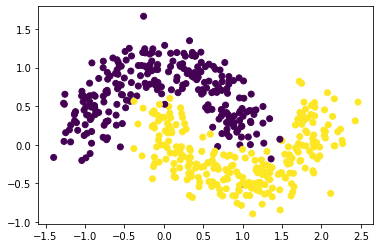

In [32]:
X, y = make_moons(noise = 0.2, n_samples=500, shuffle = True)

plt.scatter(X[:, 0], X[:, 1], c = y)

In [33]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [34]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((375, 2), (375,), (125, 2), (125,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

log = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC()

## Hard

In [36]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier([
                  ('logistic', log),
                  ('neighbour', knn),
                  ('tree', dt),
                  ('nb', nb),
                  ('svm', svc)
], n_jobs=-1)

In [37]:
vot.fit(X, y)
vot.score(X, y)

0.984

In [38]:
base = [log, knn, dt, nb, svc, vot]

for model in base:
    model.fit(xtrain, ytrain)
    sc = model.score(xtest, ytest)
    print(model.__class__.__name__, sc)

LogisticRegression 0.832
KNeighborsClassifier 0.976
DecisionTreeClassifier 0.968
GaussianNB 0.84
SVC 0.968
VotingClassifier 0.96


## Soft

In [41]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier([
                  ('logistic', log),
                  ('neighbour', knn),
                  ('tree', dt),
                  ('nb', nb),
                  ('svm', SVC(probability=True))
], n_jobs=-1, voting='soft')

In [42]:
base = [log, knn, dt, nb, svc, vot]

for model in base:
    model.fit(xtrain, ytrain)
    sc = model.score(xtest, ytest)
    print(model.__class__.__name__, sc)

LogisticRegression 0.832
KNeighborsClassifier 0.976
DecisionTreeClassifier 0.968
GaussianNB 0.84
SVC 0.968
VotingClassifier 0.968
